In [37]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
# Instantialte tsne, specify cosine metric
tsne = TSNE(random_state = 0, n_iter = 1000, metric = 'cosine')

In [38]:
#read embeddings from CSV
embeddings_torah = pd.read_csv('/content/fout_embeddings_torah.csv',header=None)
embeddings_quran = pd.read_csv('/content/fout_embeddings_quran.csv',header=None)
embeddings_bible = pd.read_csv('/content/fout_embeddings_bible.csv',header=None)

In [39]:
# Fit and transform (each book separately) 
# Note that they cannot be plotted together (see T-SNE definition)
embeddings2d_torah = tsne.fit_transform(embeddings_torah)
embeddings2d_quran = tsne.fit_transform(embeddings_quran)
embeddings2d_bible = tsne.fit_transform(embeddings_bible)

In [ ]:
# Fit and transform (all books together)
# This can be plotted together (we will color each verse to indicate the book it belongs to)
concat_embeddings = [embeddings_torah, embeddings_quran, embeddings_bible]
all_embeddings = pd.concat(concat_embeddings)
all_embeddings2d = tsne.fit_transform(all_embeddings)

In [41]:
# Create DF
embeddingsdf_torah = pd.DataFrame()
embeddingsdf_quran = pd.DataFrame()
embeddingsdf_bible = pd.DataFrame()
embeddingsdf_all = pd.DataFrame()

# Add x coordinate
embeddingsdf_torah['x'] = embeddings2d_torah[:,0]
embeddingsdf_quran['x'] = embeddings2d_quran[:,0]
embeddingsdf_bible['x'] = embeddings2d_bible[:,0]
embeddingsdf_all['x']   = all_embeddings2d[:,0]

# Add y coordinate
embeddingsdf_torah['y'] = embeddings2d_torah[:,1]
embeddingsdf_quran['y'] = embeddings2d_quran[:,1]
embeddingsdf_bible['y'] = embeddings2d_bible[:,1]
embeddingsdf_all['y']   = all_embeddings2d[:,1]

# Add color
embeddingsdf_torah['color'] = '0000ff'
embeddingsdf_quran['color'] = 'ff0000'
embeddingsdf_bible['color'] = '00ff00'
embeddingsdf_all['color'] = ''
embeddingsdf_all.iloc[0:5851, -1] = '0000ff'
embeddingsdf_all.iloc[5852:12087, -1] = 'ff0000'
embeddingsdf_all.iloc[12088:43191, -1] = '00ff00'

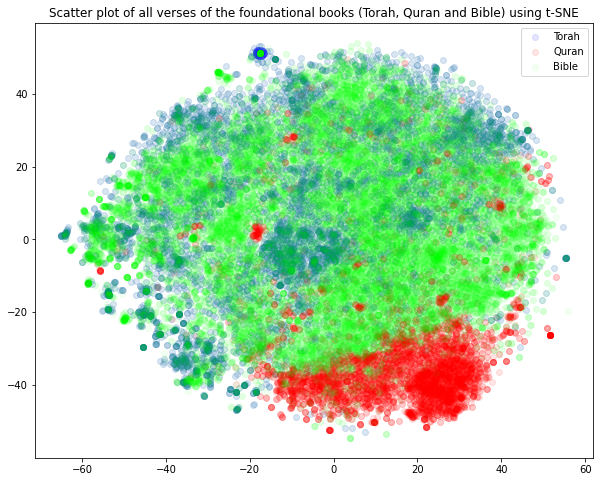

In [42]:
import matplotlib.pyplot as plt
#Set figsize
fig, ax = plt.subplots(figsize=(10,8))
#Scatter points, set alpha low to make points translucent
ax.scatter(embeddingsdf_all.iloc[0:5851, 0], embeddingsdf_all.iloc[0:5851, 1], c='#0000ff', alpha=.1, label="Torah")
ax.scatter(embeddingsdf_all.iloc[5852:12087, 0], embeddingsdf_all.iloc[5852:12087, 1], c='#ff0000', alpha=.1, label="Quran")
ax.scatter(embeddingsdf_all.iloc[12088:43191, 0], embeddingsdf_all.iloc[12088:43191, 1], c='#00ff00', alpha=.05, label="Bible")

# In case you want to plot each book separately, uncomment each line at a time and run. Do not forget to comment the lines above.
#ax.scatter(embeddingsdf_torah.x, embeddingsdf_torah.y, c='#0000ff', alpha=.1, label="Torah")
#ax.scatter(embeddingsdf_quran.x, embeddingsdf_quran.y, c='#ff0000', alpha=.1, label="Quran")
#ax.scatter(embeddingsdf_bible.x, embeddingsdf_bible.y, c='#00ff00', alpha=.05, label="Bible")
ax.legend()
plt.title('Scatter plot of all verses of the foundational books (Torah, Quran and Bible) using t-SNE')
plt.show()